<img src="./images/banner.png" width="800">

# Simple Linear Regression

Simple Linear Regression is a fundamental statistical and machine learning technique used to model the relationship between two variables. It serves as the building block for more complex regression analyses and is widely applied in various fields, from economics to natural sciences.


🔑 **Key Concept:** Simple Linear Regression attempts to find a linear relationship between a dependent variable (often denoted as $y$) and a single independent variable (often denoted as $x$).


In this model, we assume that the relationship between $x$ and $y$ can be approximated by a straight line. The goal is to find the best-fitting line that minimizes the difference between the predicted values and the actual observed values.


The general form of a simple linear regression equation is:

$y = \beta_0 + \beta_1x + \epsilon$

Where:
- $y$ is the dependent variable (what we're trying to predict)
- $x$ is the independent variable (our input or feature)
- $\beta_0$ is the y-intercept (the value of $y$ when $x = 0$)
- $\beta_1$ is the slope of the line (how much $y$ changes for a unit change in $x$)
- $\epsilon$ is the error term (the difference between the predicted and actual values)


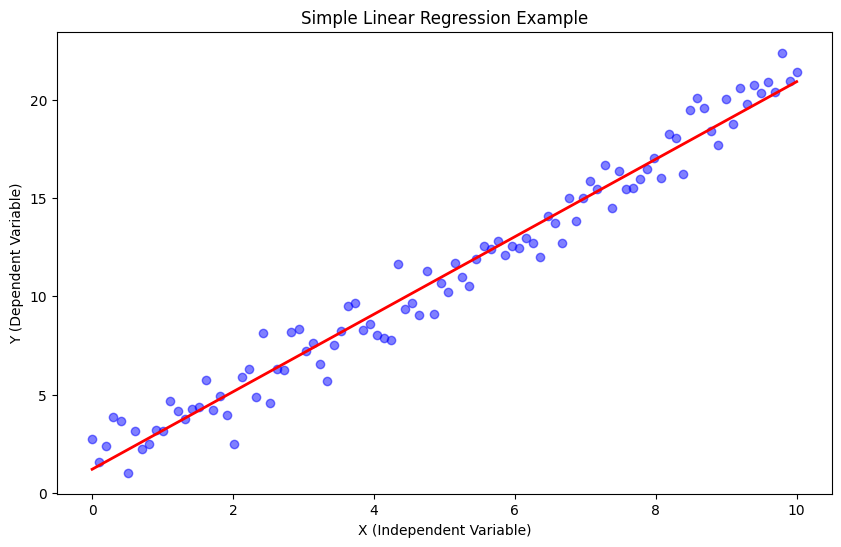

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# Generate sample data
np.random.seed(0)
X = np.linspace(0, 10, 100).reshape(-1, 1)
y = 2 * X + 1 + np.random.normal(0, 1, (100, 1))

# Fit the model
model = LinearRegression()
model.fit(X, y)

# Plot
plt.figure(figsize=(10, 6))
plt.scatter(X, y, color='blue', alpha=0.5)
plt.plot(X, model.predict(X), color='red', linewidth=2)
plt.title('Simple Linear Regression Example')
plt.xlabel('X (Independent Variable)')
plt.ylabel('Y (Dependent Variable)')
plt.show()

💡 **Why This Matters:** Understanding Simple Linear Regression is crucial because:
1. It helps in predicting future outcomes based on past data.
2. It quantifies the strength of the relationship between two variables.
3. It serves as a foundation for more complex regression techniques.


Simple Linear Regression finds applications in various real-world scenarios:
- Predicting house prices based on square footage
- Estimating sales based on advertising spend
- Forecasting crop yield based on rainfall


💡 **Note:** While Simple Linear Regression is powerful, it's important to remember that it assumes a linear relationship between variables. In many real-world scenarios, relationships may be more complex, requiring more advanced techniques.


In the following sections, we'll dive deeper into the mechanics of Simple Linear Regression, including how to fit a model, interpret its results, and evaluate its performance.

**Table of contents**<a id='toc0_'></a>    
- [The Linear Regression Model](#toc1_)    
  - [The Equation](#toc1_1_)    
  - [Example](#toc1_2_)    
- [Assumptions of Simple Linear Regression](#toc2_)    
  - [Checking Assumptions](#toc2_1_)    
- [Maximum Likelihood Formulation](#toc3_)    
  - [Probabilistic Model](#toc3_1_)    
  - [Why Normal Distribution?](#toc3_2_)    
  - [Likelihood Function](#toc3_3_)    
  - [Log-Likelihood Function](#toc3_4_)    
  - [Maximum Likelihood Estimation](#toc3_5_)    
- [Ordinary Least Squares (OLS) Method](#toc4_)    
  - [The OLS Principle](#toc4_1_)    
  - [OLS Estimators](#toc4_2_)    
  - [Properties of OLS Estimators](#toc4_3_)    
  - [OLS vs. Maximum Likelihood Estimation (MLE)](#toc4_4_)    
  - [Practical Considerations](#toc4_5_)    
- [Visualizing Simple Linear Regression](#toc5_)    
  - [Scatter Plot with Regression Line](#toc5_1_)    
  - [Residual Plot](#toc5_2_)    
  - [Q-Q Plot](#toc5_3_)    
- [Strengths and Limitations of Simple Linear Regression](#toc6_)    
  - [Strengths](#toc6_1_)    
  - [Limitations](#toc6_2_)    
  - [When to Use Simple Linear Regression](#toc6_3_)    
  - [When to Consider Alternatives](#toc6_4_)    
- [Summary and Key Takeaways](#toc7_)    

<!-- vscode-jupyter-toc-config
	numbering=false
	anchor=true
	flat=false
	minLevel=2
	maxLevel=6
	/vscode-jupyter-toc-config -->
<!-- THIS CELL WILL BE REPLACED ON TOC UPDATE. DO NOT WRITE YOUR TEXT IN THIS CELL -->

## <a id='toc1_'></a>[The Linear Regression Model](#toc0_)

The Linear Regression Model forms the core of simple linear regression analysis. It provides a mathematical framework for understanding and predicting the relationship between two variables. Let's explore the key components of this model.


🔑 **Key Concept:** The linear regression model assumes that the relationship between the independent variable $(x)$ and the dependent variable $(y)$ can be represented by a straight line.


### <a id='toc1_1_'></a>[The Equation](#toc0_)


The linear regression model is expressed by the following equation:

$y = \beta_0 + \beta_1x + \epsilon$


Let's break down each component:

- $y$: The dependent variable (outcome or target)
- $x$: The independent variable (predictor or feature)
- $\beta_0$: The y-intercept (the value of $y$ when $x = 0$)
- $\beta_1$: The slope (how much $y$ changes for a one-unit increase in $x$)
- $\epsilon$: The error term (captures all other factors that influence $y$)


💡 **Pro Tip:** Think of $\beta_0$ and $\beta_1$ as the parameters we need to learn from the data to make our model work.


Let's interpret the equation in the context of a real-world example:
1. **Slope ($\beta_1$)**: Represents the change in $y$ for a one-unit change in $x$. 
   - If $\beta_1 > 0$, $y$ increases as $x$ increases.
   - If $\beta_1 < 0$, $y$ decreases as $x$ increases.
   - If $\beta_1 = 0$, there's no linear relationship between $x$ and $y$.

2. **Intercept ($\beta_0$)**: The expected value of $y$ when $x = 0$. 
   - Sometimes this has a meaningful interpretation, but often it's just a mathematical construct.

3. **Error Term ($\epsilon$)**: Represents the deviation of actual $y$ values from the predicted line.
   - Assumed to be normally distributed with mean zero.
   - Captures the effect of all other variables not included in the model.


### <a id='toc1_2_'></a>[Example](#toc0_)


Let's consider a simple example: predicting a person's weight based on their height.


If our model gives us $\beta_0 = 10$ and $\beta_1 = 2$, our equation would be:

$\text{Weight} = 10 + 2 \times \text{Height}$


This means:
- For every 1 unit increase in height, we expect weight to increase by 2 units.
- When height is 0, the expected weight is 10 (though this might not make practical sense in this context).


💡 **Note:** While the linear model is simple and interpretable, it's crucial to remember that many real-world relationships are not perfectly linear. Always validate your model's assumptions and consider more complex models if needed.


In the next section, we'll explore the key assumptions underlying the linear regression model.

## <a id='toc2_'></a>[Assumptions of Simple Linear Regression](#toc0_)

Simple Linear Regression relies on several key assumptions. Understanding these assumptions is crucial for correctly applying the model and interpreting its results. When these assumptions are violated, the model's reliability and predictive power may be compromised.


Let's explore the main assumptions:

1. Linearity

    - The relationship between the independent variable $(x)$ and the dependent variable $(y)$ should be linear. This means that the change in $y$ for a given change in $x$ is constant throughout the range of values.

💡 **Tip:** You can check this assumption by plotting the data and looking for a linear pattern. Residual plots can also help identify non-linearity.

2. Independence

    - The observations should be independent of each other. This means that the value of one observation should not influence or be influenced by other observations.

3. Homoscedasticity

    - The variance of the residuals should be constant across all levels of the independent variable. This assumption is also known as homogeneity of variance.

💡 **Note:** Heteroscedasticity (non-constant variance) can lead to inefficient estimates and unreliable inference.

4. Normality

    - The residuals (errors) should be normally distributed. This assumption is particularly important for hypothesis testing and constructing confidence intervals.

5. No or Little Multicollinearity

    - In the case of simple linear regression with only one independent variable, this assumption is automatically satisfied. However, it becomes crucial in multiple linear regression.

6. No Outliers

    - The presence of outliers can significantly impact the regression line and lead to unreliable predictions.


### <a id='toc2_1_'></a>[Checking Assumptions](#toc0_)


To validate these assumptions, you can use various techniques:

1. **Scatter plots**: To check linearity and homoscedasticity
2. **Q-Q plots**: To check normality of residuals
3. **Residual plots**: To check linearity, homoscedasticity, and identify outliers
4. **Durbin-Watson test**: To check independence


Always visualize your data and residuals to assess the validity of the assumptions. If the assumptions are violated, consider using robust regression techniques or transforming the data. You will learn more about these techniques in the later lectures.


💡 **Why This Matters:** Violating these assumptions can lead to:
- Biased coefficient estimates
- Incorrect standard errors
- Unreliable confidence intervals and hypothesis tests
- Poor predictive performance


Understanding and checking these assumptions is a critical step in ensuring the validity of your simple linear regression model. In the next section, we'll explore how to estimate the model parameters using the Ordinary Least Squares method.

## <a id='toc3_'></a>[Maximum Likelihood Formulation](#toc0_)

Before diving into the Ordinary Least Squares (OLS) method, it's crucial to understand the Maximum Likelihood Estimation (MLE) approach for linear regression. MLE provides a probabilistic framework for estimating the parameters of our linear regression model.


### <a id='toc3_1_'></a>[Probabilistic Model](#toc0_)


In the maximum likelihood formulation, we view the dependent variable $y$ as a random variable that follows a probability distribution. For linear regression, we typically assume that $y$ follows a normal distribution with a mean that depends on $x$ and a constant variance.


Mathematically, we can express this as:

$y_i \sim \mathcal{N}(\mu_i, \sigma^2)$

where $\mu_i = \beta_0 + \beta_1x_i$


Here, $\mathcal{N}$ denotes the normal distribution, $\mu_i$ is the mean for the $i$-th observation, and $\sigma^2$ is the variance of the error term.


### <a id='toc3_2_'></a>[Why Normal Distribution?](#toc0_)


The assumption that $y$ follows a normal distribution is not arbitrary. There are several intuitive reasons for this choice:

1. **Central Limit Theorem**: In many real-world scenarios, the dependent variable is influenced by numerous small, independent factors. The Central Limit Theorem states that the sum of many independent random variables tends to follow a normal distribution, regardless of the underlying distributions of these variables.

2. **Error Structure**: We assume that our model ($\beta_0 + \beta_1x$) captures the main relationship between $x$ and $y$, and any deviations from this relationship are due to random errors. These errors are often the result of many small, unaccounted-for factors, which, again by the Central Limit Theorem, tend to be normally distributed.

3. **Symmetry**: The normal distribution is symmetric, implying that positive and negative errors are equally likely. This aligns with our intuition that our model is unbiased and errors are random.

4. **Mathematical Convenience**: The normal distribution has nice mathematical properties that make derivations and computations more tractable.

5. **Empirical Evidence**: In practice, many natural and social phenomena exhibit normally distributed characteristics.


💡 **Note:** While the normal distribution is a common and often reasonable assumption, it's important to verify this assumption with your data. In some cases, other distributions might be more appropriate.


### <a id='toc3_3_'></a>[Likelihood Function](#toc0_)


The likelihood function is the joint probability of observing our data, given the model parameters. For $n$ independent observations, the likelihood function is:

$L(\beta_0, \beta_1| \mathbf{x}, \mathbf{y}) = \prod_{i=1}^n \frac{1}{\sqrt{2\pi\sigma^2}} \exp\left(-\frac{(y_i - (\beta_0 + \beta_1x_i))^2}{2\sigma^2}\right)$


### <a id='toc3_4_'></a>[Log-Likelihood Function](#toc0_)


It's often more convenient to work with the log-likelihood function:

$\ell(\beta_0, \beta_1 | \mathbf{x}, \mathbf{y}) = -\frac{n}{2}\log(2\pi\sigma^2) - \frac{1}{2\sigma^2}\sum_{i=1}^n (y_i - (\beta_0 + \beta_1x_i))^2$

Given that the first term is independent of the parameters, maximizing the log-likelihood is equivalent to minimizing the sum of squared residuals, which is the basis of the Ordinary Least Squares method.

### <a id='toc3_5_'></a>[Maximum Likelihood Estimation](#toc0_)


The goal of MLE is to find the values of $\beta_0$, $\beta_1$, and $\sigma^2$ that maximize the log-likelihood function. We can do this by taking partial derivatives of the log-likelihood with respect to each parameter and setting them to zero:

$\frac{\partial \ell}{\partial \beta_0} = 0$
$\frac{\partial \ell}{\partial \beta_1} = 0$


Solving these equations leads to the following estimators:

$\hat{\beta_1} = \frac{\sum_{i=1}^n (x_i - \bar{x})(y_i - \bar{y})}{\sum_{i=1}^n (x_i - \bar{x})^2}$

$\hat{\beta_0} = \bar{y} - \hat{\beta_1}\bar{x}$


💡 **Why This Matters:** Understanding the MLE formulation and the rationale behind the normal distribution assumption provides a solid theoretical foundation for linear regression. It connects probability theory with regression analysis, offering insights into the model's assumptions and properties.


In the next section, we'll explore how these concepts relate to the Ordinary Least Squares method, which provides a computationally simpler approach to estimating the regression parameters.

## <a id='toc4_'></a>[Ordinary Least Squares (OLS) Method](#toc0_)

The Ordinary Least Squares (OLS) method is a popular technique for estimating the parameters of a linear regression model. It provides a computationally efficient approach to finding the best-fitting line through a set of points.


### <a id='toc4_1_'></a>[The OLS Principle](#toc0_)


The core idea behind OLS is to minimize the sum of the squared differences between the observed values and the predicted values from the model.

🔑 **Key Concept:** OLS finds the line that minimizes the sum of squared residuals.


Mathematically, we aim to minimize:

$\sum_{i=1}^n (y_i - (\beta_0 + \beta_1x_i))^2$

Where:
- $y_i$ is the observed value
- $\beta_0 + \beta_1x_i$ is the predicted value


### <a id='toc4_2_'></a>[OLS Estimators](#toc0_)


By minimizing this sum of squared residuals, we obtain the following estimators:

$\hat{\beta_1} = \frac{\sum_{i=1}^n (x_i - \bar{x})(y_i - \bar{y})}{\sum_{i=1}^n (x_i - \bar{x})^2}$

$\hat{\beta_0} = \bar{y} - \hat{\beta_1}\bar{x}$


Where $\bar{x}$ and $\bar{y}$ are the means of $x$ and $y$ respectively.


### <a id='toc4_3_'></a>[Properties of OLS Estimators](#toc0_)


1. **Unbiasedness**: The OLS estimators are unbiased, meaning their expected values equal the true parameter values.
2. **Consistency**: As the sample size increases, the estimates converge to the true parameter values.
3. **Efficiency**: Among all unbiased linear estimators, OLS has the smallest variance (Gauss-Markov Theorem).


### <a id='toc4_4_'></a>[OLS vs. Maximum Likelihood Estimation (MLE)](#toc0_)


While we derived OLS and MLE separately, they are closely related. Here's how they compare:

1. **Assumptions**:
   - OLS makes no explicit distributional assumptions about the errors.
   - MLE assumes normally distributed errors.

2. **Estimators**:
   - For linear regression with normally distributed errors, OLS and MLE produce identical estimators for $\beta_0$ and $\beta_1$.

3. **Interpretation**:
   - OLS is often interpreted geometrically as finding the line that minimizes the sum of squared vertical distances from the data points.
   - MLE has a probabilistic interpretation, finding the parameters that make the observed data most likely.

4. **Flexibility**:
   - OLS is specific to minimizing squared errors.
   - MLE can be adapted to other error distributions, making it more flexible for different types of data.

5. **Additional Parameters**:
   - OLS focuses on estimating $\beta_0$ and $\beta_1$.
   - MLE also provides an estimate for the error variance $\sigma^2$.

6. **Computational Approach**:
   - OLS can be solved analytically and is computationally straightforward.
   - MLE often requires numerical optimization techniques, especially for more complex models.


💡 **Why This Matters:** Understanding both OLS and MLE provides a richer perspective on linear regression. While they often lead to the same results in simple linear regression, the conceptual differences become important when dealing with more complex models or non-normal error distributions.


### <a id='toc4_5_'></a>[Practical Considerations](#toc0_)


In practice, OLS is widely used due to its simplicity and the fact that it doesn't require distributional assumptions. However, when working with small samples or when you need to estimate confidence intervals or perform hypothesis tests, the normality assumption (which aligns OLS with MLE) becomes important.


## <a id='toc5_'></a>[Visualizing Simple Linear Regression](#toc0_)

Visualization is a powerful tool for understanding and communicating the results of simple linear regression. It helps in grasping the relationship between variables, assessing model fit, and identifying potential issues.


### <a id='toc5_1_'></a>[Scatter Plot with Regression Line](#toc0_)


The most basic and essential visualization for simple linear regression is a scatter plot of the data points with the fitted regression line.


Text(0.5, 1.0, 'Scatter Plot with Regression Line')

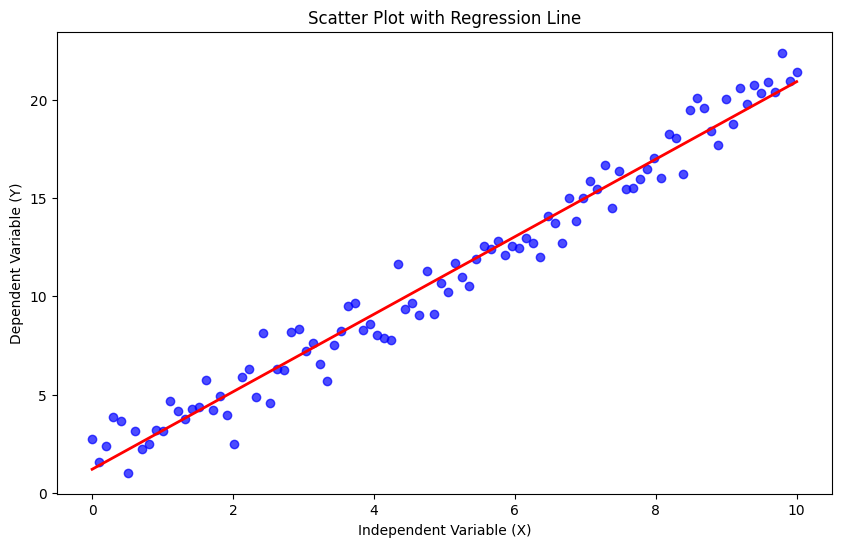

In [4]:
import matplotlib.pyplot as plt
import numpy as np

# Assuming you have x and y data, and have fitted the model
plt.figure(figsize=(10, 6))
plt.scatter(X, y, color='blue', alpha=0.7)
plt.plot(X, model.predict(X), color='red', linewidth=2)
plt.xlabel('Independent Variable (X)')
plt.ylabel('Dependent Variable (Y)')
plt.title('Scatter Plot with Regression Line')

💡 **Tip:** Always include axis labels and a title in your plots for clear communication.


### <a id='toc5_2_'></a>[Residual Plot](#toc0_)


A residual plot helps visualize the differences between observed and predicted values. It's crucial for checking the assumptions of linearity and homoscedasticity.


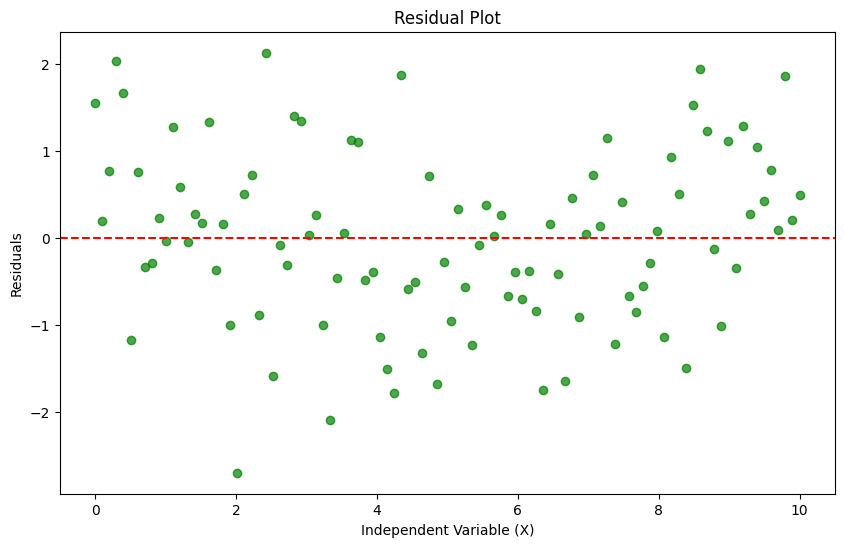

In [5]:
residuals = y - model.predict(X)
plt.figure(figsize=(10, 6))
plt.scatter(X, residuals, color='green', alpha=0.7)
plt.axhline(y=0, color='red', linestyle='--')
plt.xlabel('Independent Variable (X)')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.show()

In [20]:
import seaborn as sns

🔑 **Key Concept:** In a well-fitted model, residuals should be randomly scattered around the zero line without any clear pattern.


### <a id='toc5_3_'></a>[Q-Q Plot](#toc0_)


A Quantile-Quantile (Q-Q) plot helps assess whether the residuals follow a normal distribution.


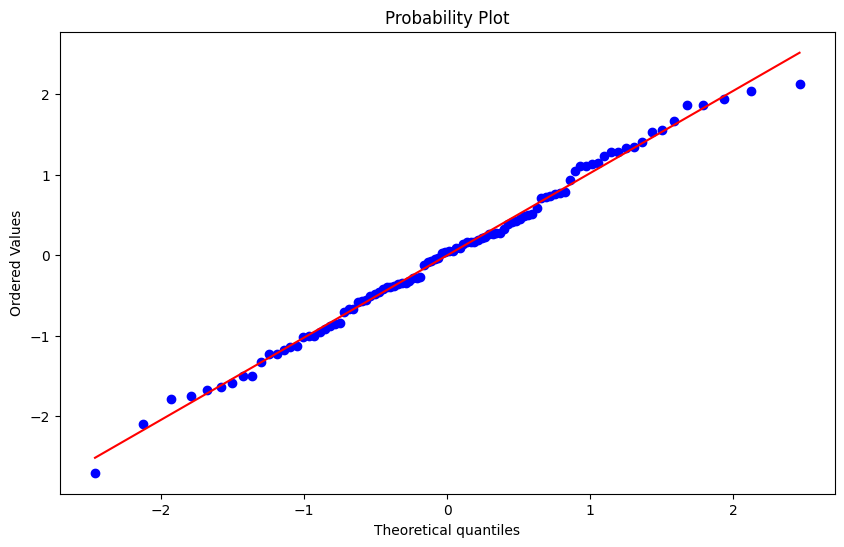

In [12]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

# Assuming you have already calculated the residuals
residuals = y - model.predict(X)

fig, ax = plt.subplots(figsize=(10, 6))

# Calculate the quantiles
stats.probplot(residuals.flatten(), dist="norm", plot=ax);

💡 **Note:** Points following a straight line in a Q-Q plot indicate that the residuals are normally distributed.


By using these visualizations, you can gain deeper insights into your regression model, validate its assumptions, and effectively communicate your findings to others. Remember, a picture is worth a thousand words, especially in data analysis!

## <a id='toc6_'></a>[Strengths and Limitations of Simple Linear Regression](#toc0_)

Understanding the strengths and limitations of simple linear regression is crucial for its appropriate application and interpretation. Let's explore both aspects to gain a balanced perspective on this fundamental statistical technique.


### <a id='toc6_1_'></a>[Strengths](#toc0_)


1. **Simplicity and Interpretability**
   Simple linear regression is easy to understand and explain, making it accessible to a wide audience. The coefficients have clear interpretations, allowing for straightforward insights into the relationship between variables.

2. **Computational Efficiency**
   The model parameters can be calculated directly using closed-form solutions, making it computationally efficient even for large datasets.

3. **Foundation for Advanced Techniques**
   Simple linear regression serves as a building block for more complex regression techniques and machine learning models. Understanding it thoroughly provides a solid foundation for advanced statistical learning.

4. **Predictive Power**
   Despite its simplicity, simple linear regression can provide powerful predictions when the relationship between variables is indeed linear.

5. **Diagnostic Tools**
   A rich set of diagnostic tools and statistical tests are available for assessing model fit, validating assumptions, and identifying influential observations.


💡 **Why This Matters:** The strengths of simple linear regression make it a valuable tool for initial data exploration and for situations where interpretability is crucial, such as in many business and social science applications.


### <a id='toc6_2_'></a>[Limitations](#toc0_)


1. **Assumes Linearity**
   The model assumes a linear relationship between the independent and dependent variables, which may not always hold in real-world scenarios.

2. **Sensitive to Outliers**
   Outliers can have a significant impact on the regression line, potentially leading to misleading results.

3. **Limited to Two Variables**
   Simple linear regression only considers one independent variable, which may oversimplify complex relationships in multivariate data.

4. **Assumes Independence of Errors**
   The model assumes that the errors are independent, which may not be true for time series or spatially correlated data.

5. **Assumes Homoscedasticity**
   The assumption of constant variance of residuals across all levels of the independent variable may not always hold.

6. **Cannot Infer Causality**
   Correlation does not imply causation. A strong linear relationship does not necessarily mean that changes in the independent variable cause changes in the dependent variable.

7. **Extrapolation Risks**
   Predictions made outside the range of the observed data (extrapolation) can be unreliable.


🔑 **Key Concept:** Recognizing these limitations is crucial for avoiding misuse or over-interpretation of simple linear regression results.


### <a id='toc6_3_'></a>[When to Use Simple Linear Regression](#toc0_)


- When you have reason to believe the relationship between two variables is linear
- For initial exploration of the relationship between two variables
- When you need a simple, interpretable model for prediction or explanation
- As a baseline model to compare with more complex techniques


### <a id='toc6_4_'></a>[When to Consider Alternatives](#toc0_)


- When dealing with multiple predictors (consider multiple linear regression)
- When the relationship is clearly non-linear (consider polynomial regression or non-linear models)
- For time series data with autocorrelation (consider time series models)
- When dealing with categorical outcomes (consider logistic regression)


💡 **Pro Tip:** Always plot your data before applying simple linear regression. Visual inspection can reveal non-linear patterns or other issues that might violate the model's assumptions.


By understanding both the strengths and limitations of simple linear regression, you can make informed decisions about when to apply it and how to interpret its results. Remember, the goal is not just to fit a model, but to gain meaningful insights from your data.

## <a id='toc7_'></a>[Summary and Key Takeaways](#toc0_)

Simple Linear Regression is a fundamental statistical technique that forms the basis for many advanced analytical methods. Let's recap the key points we've covered in this lecture:

1. **Model Definition**
   Simple Linear Regression models the relationship between two variables using a linear equation:
   $y = \beta_0 + \beta_1x + \epsilon$

2. **Assumptions**
   - Linearity
   - Independence of errors
   - Homoscedasticity
   - Normality of residuals

3. **Estimation Methods**
   - Ordinary Least Squares (OLS)
   - Maximum Likelihood Estimation (MLE)

4. **Interpretation**
   - $\beta_0$ (intercept): The expected value of $y$ when $x = 0$
   - $\beta_1$ (slope): The change in $y$ for a one-unit increase in $x$

5. **Visualization Techniques**
   - Scatter plot with regression line
   - Residual plot
   - Q-Q plot


Next steps to deepen your understanding of Simple Linear Regression:
- Practice applying Simple Linear Regression to various datasets
- Explore how to handle violations of assumptions
- Learn about multiple linear regression for scenarios with more than one predictor variable
- Investigate non-linear regression techniques for more complex relationships


Remember, mastering Simple Linear Regression provides a strong foundation for more advanced statistical and machine learning techniques. Keep practicing and applying these concepts to real-world problems to deepen your understanding.


💡 **Final Note:** The goal of any statistical analysis, including Simple Linear Regression, is not just to produce numbers, but to gain actionable insights. Always tie your analysis back to the original question or problem you're trying to solve.